# ***Stock Price Prediction***

---




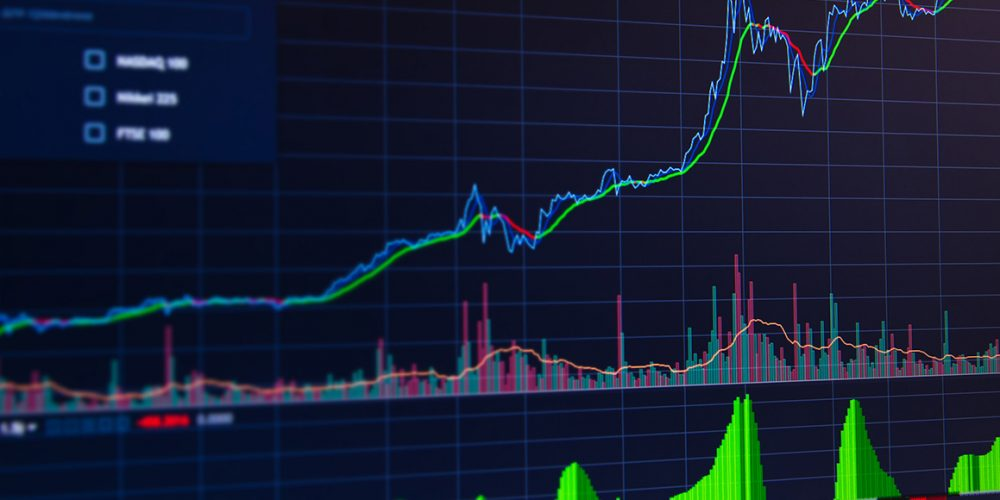


Time series data is a type of data that is collected at regular intervals over time. 
In these notebook,We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

Along in these NoteBook wz will answer the following questions : 

*   What is the change of the stock price over time ?
*   What is the daily return of the stock on average ?
*   What is hte moving average of the various stocks?
*   What  is the correslation between different stocks ?
*   What id hte risk of investing in a particular stock ?
*   How we can attemp the predict future stock price ?

*For more details about [Finance Thermonology](https://www.ferventlearning.com/how-to-calculate-stock-returns/#Profits_vs_Return)*

## Explore The Data 
We will use the stock data from [Yahoo Finance Website](https://https://finance.yahoo.com/)
 a real-time stock quotes, investment insights, and personal finance advice.

 To get the data from Yahoo Finance, we will use yFinance library.



1.   What is the change in the price of the Stock overTime?:



In [2]:
!pip install -q yfinance

In [3]:
from ast import increment_lineno
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('dark_background')
%matplotlib inline

#For the Data Reading from the Yahoo Finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


yf.pdr_override()

#For time stamps
from datetime import datetime

# The company stocks we will use to analyse the stocks
tech_list=['AAPL','GOOG','MSFT','AMZN']

#Set up the ENd and Start Times for data collect
end = datetime.now()
start=datetime(end.year - 1, end.month, end.day) #We will use the data for an entire year

for stock in tech_list:
  globals()[stock]=yf.download(stock,start,end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10),df.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(                  Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2023-04-10  100.959999  102.199997   99.570000  102.169998  102.169998   
 2023-04-11  100.800003  101.000000   99.010002   99.919998   99.919998   
 2023-04-12  100.400002  100.510002   97.709999   97.830002   97.830002   
 2023-04-13   98.949997  102.570000   98.709999  102.400002  102.400002   
 2023-04-14  102.070000  103.199997  101.110001  102.510002  102.510002   
 2023-04-17  103.160004  103.730003  101.589996  102.739998  102.739998   
 2023-04-18  103.949997  104.199997  101.519997  102.300003  102.300003   
 2023-04-19  101.580002  105.120003  101.389999  104.300003  104.300003   
 2023-04-20  103.529999  105.250000  103.209999  103.809998  103.809998   
 2023-04-21  106.099998  108.150002  105.080002  106.959999  106.959999   
 
               Volume company_name  
 Date                               
 2023-04-10  37261200   

By rendering a portion of the data we figure out that the index of the data is the date 

### Statistical exploration of the data

In [4]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,149.181120,151.232240,147.362800,149.406680,149.024501,7.994827e+07
std,10.602433,10.482986,10.753316,10.681784,10.671205,2.486603e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.099998,143.722496,139.924995,142.457497,141.965420,6.404150e+07
50%,148.864998,150.889999,147.200005,149.295006,148.892677,7.478095e+07
75%,156.062500,158.015003,154.034996,156.720005,155.844021,8.907682e+07
max,173.750000,176.149994,173.119995,174.550003,173.995270,1.826020e+08


We only have 250 record because it's only about working days

In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-04-25 to 2023-04-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


#### CLosing Price
A stock closing price is the final price of a stock at the end of a trading day on a stock exchange. This price is determined by the supply and demand of the stock in the market and reflects the consensus of investors about the value of the company at the end of the trading day.

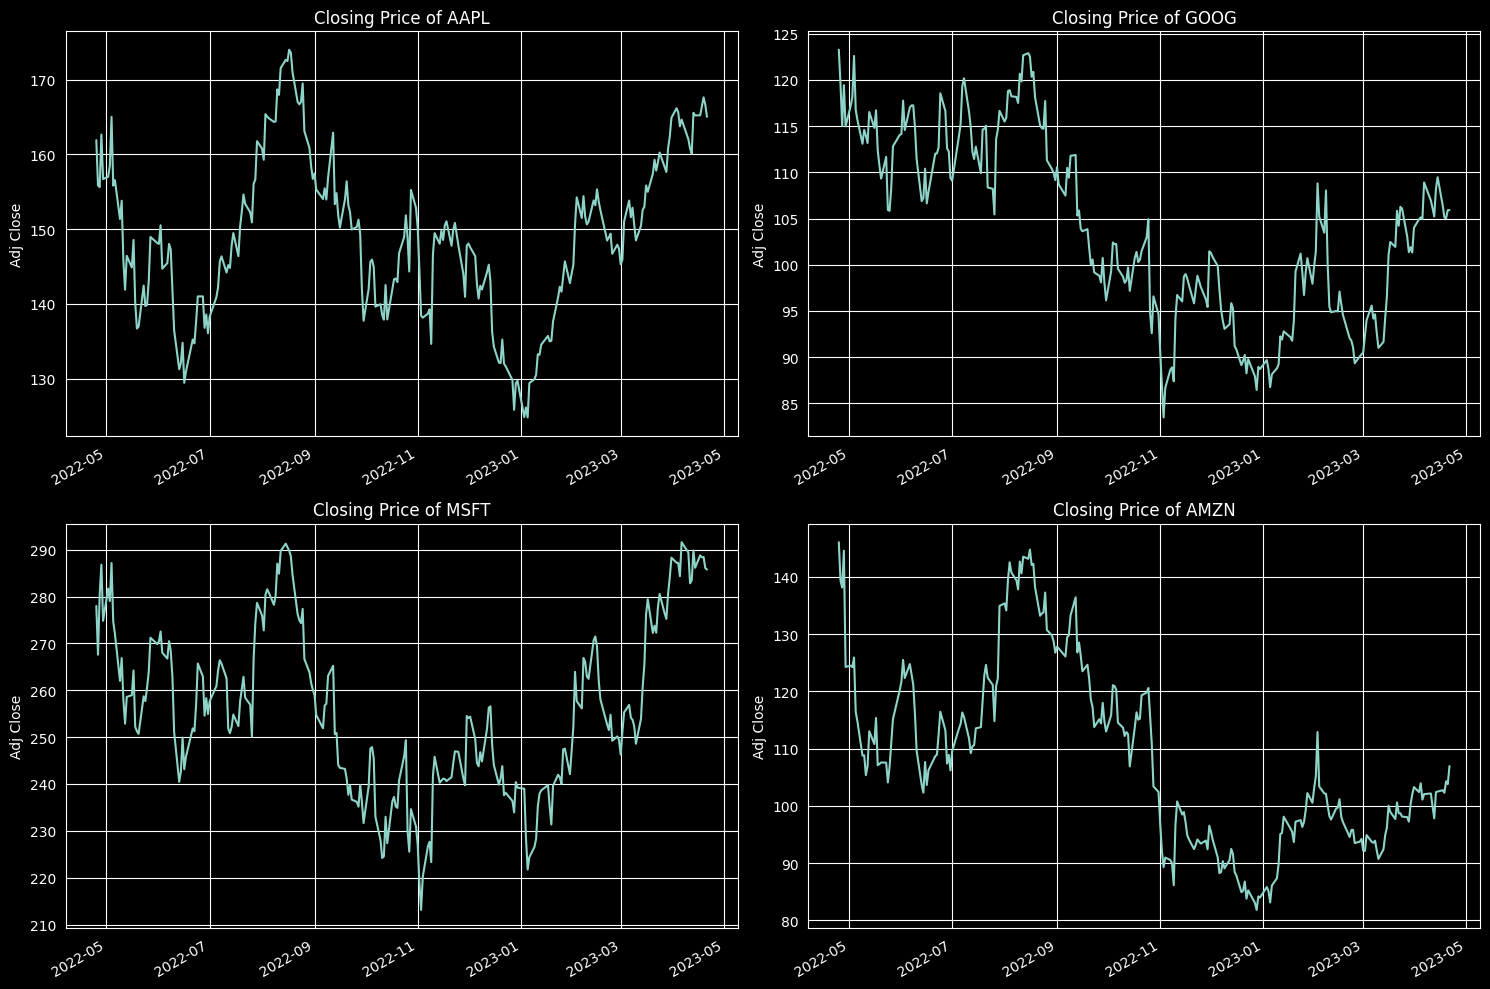

In [6]:
# The historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

### Volume of Sales
The volume of sales is the total quantity of goods or services sold by a company over a specific period of time, and is a key performance indicator used to evaluate a company's performance, growth potential, and competitive position.

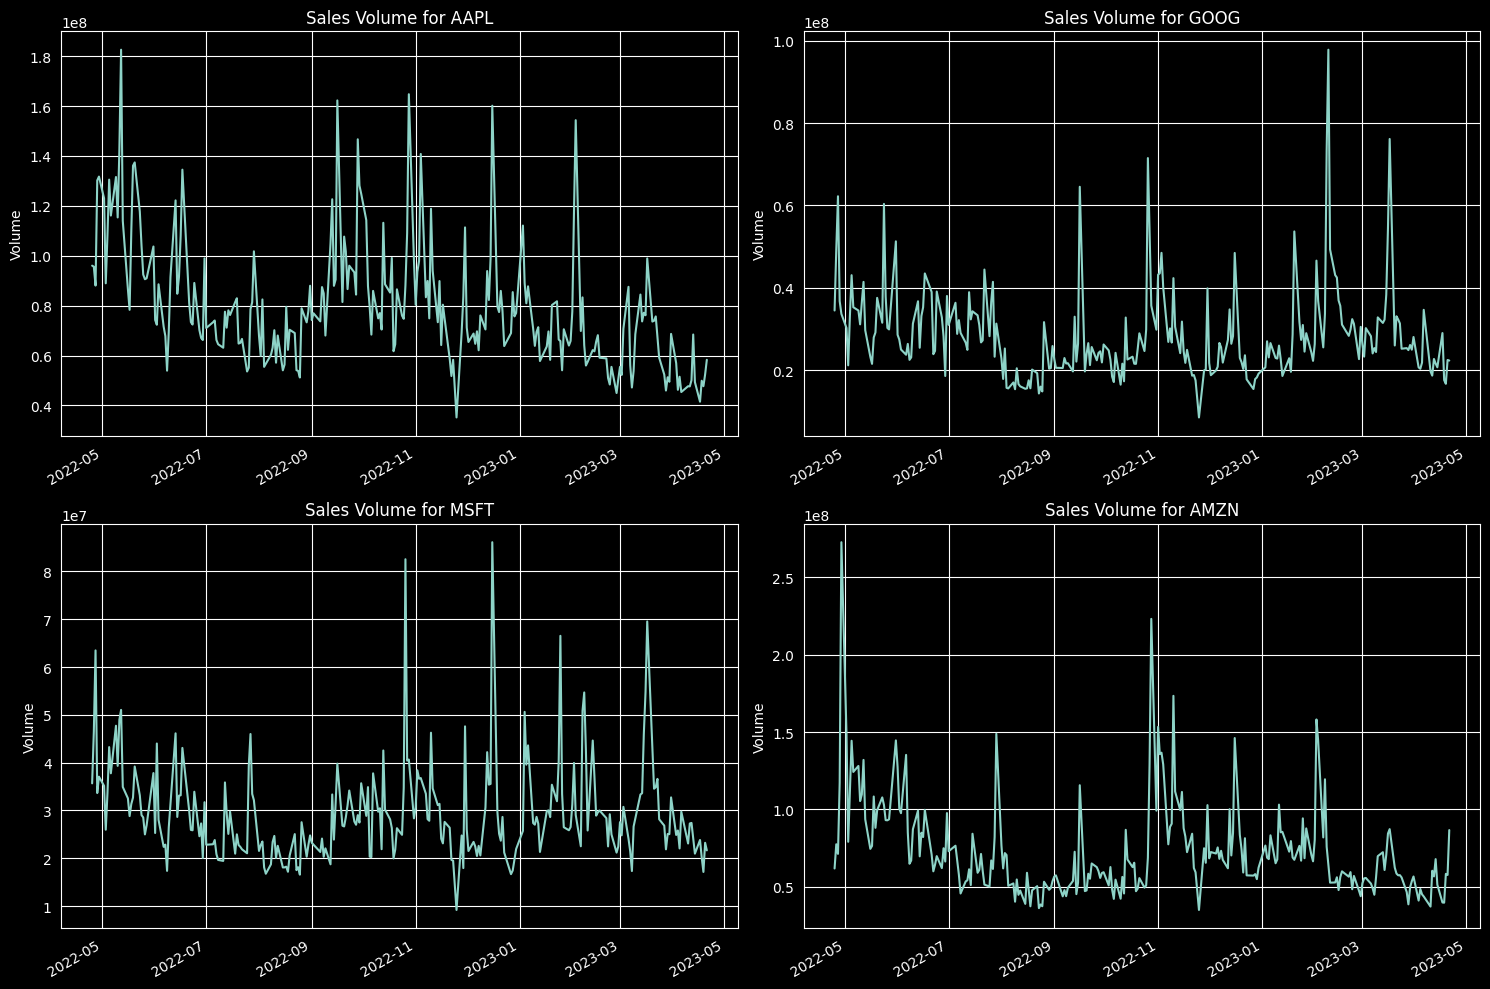

In [7]:
# The total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()


2.   The Moving Average of the Various Stocks?

The moving average of various stocks is the calculation of the average price of a stock over a specific period of time, which is updated as new data becomes available, and is commonly used in technical analysis to identify trends and potential support and resistance levels.


 *The recommended value of the period for the moving average depends on the specific analysis and trading strategy being employed, as well as the time horizon of the investor or trader.*

*Shorter periods, such as 5, 10, or 20 days, are commonly used for short-term trading and can help identify short-term trends and potential trading signals. Longer periods, such as 50, 100, or 200 days, are commonly used for longer-term investing and can help identify longer-term trends and potential investment opportunities.*

*However, there is no single "best" period for moving averages, as different timeframes and market conditions may require different values. It is important to experiment with different periods and use other technical indicators and analysis to confirm signals and avoid false signals.*

*Ultimately, the choice of period for moving averages should be based on a thorough understanding of the underlying market dynamics and the investor or trader's risk tolerance, investment goals, and trading style.*

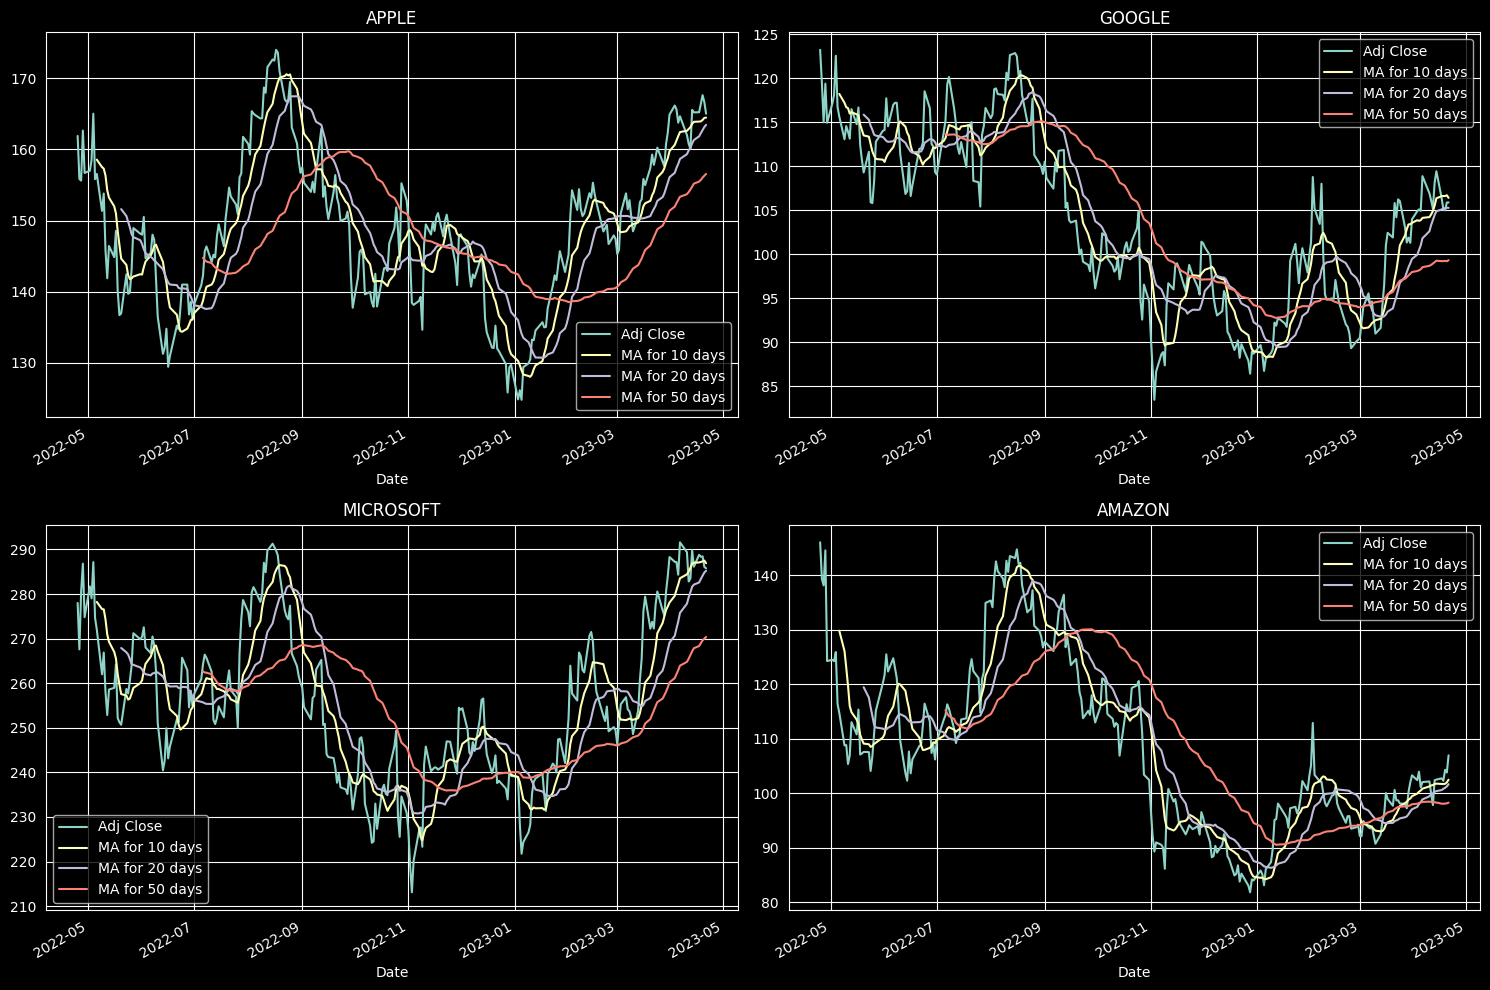

In [8]:
ma_day=[10,20,50]

for ma in ma_day:
  for company in company_list:
    column_name=f"MA for {ma} days"
    company[column_name]=company["Adj Close"].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)


AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.


3.   The daily return of hte stock on average?

Let dive deeper in order to analyse the risk of the stock .To do so we need to take a close look at the daily changes of the stock.

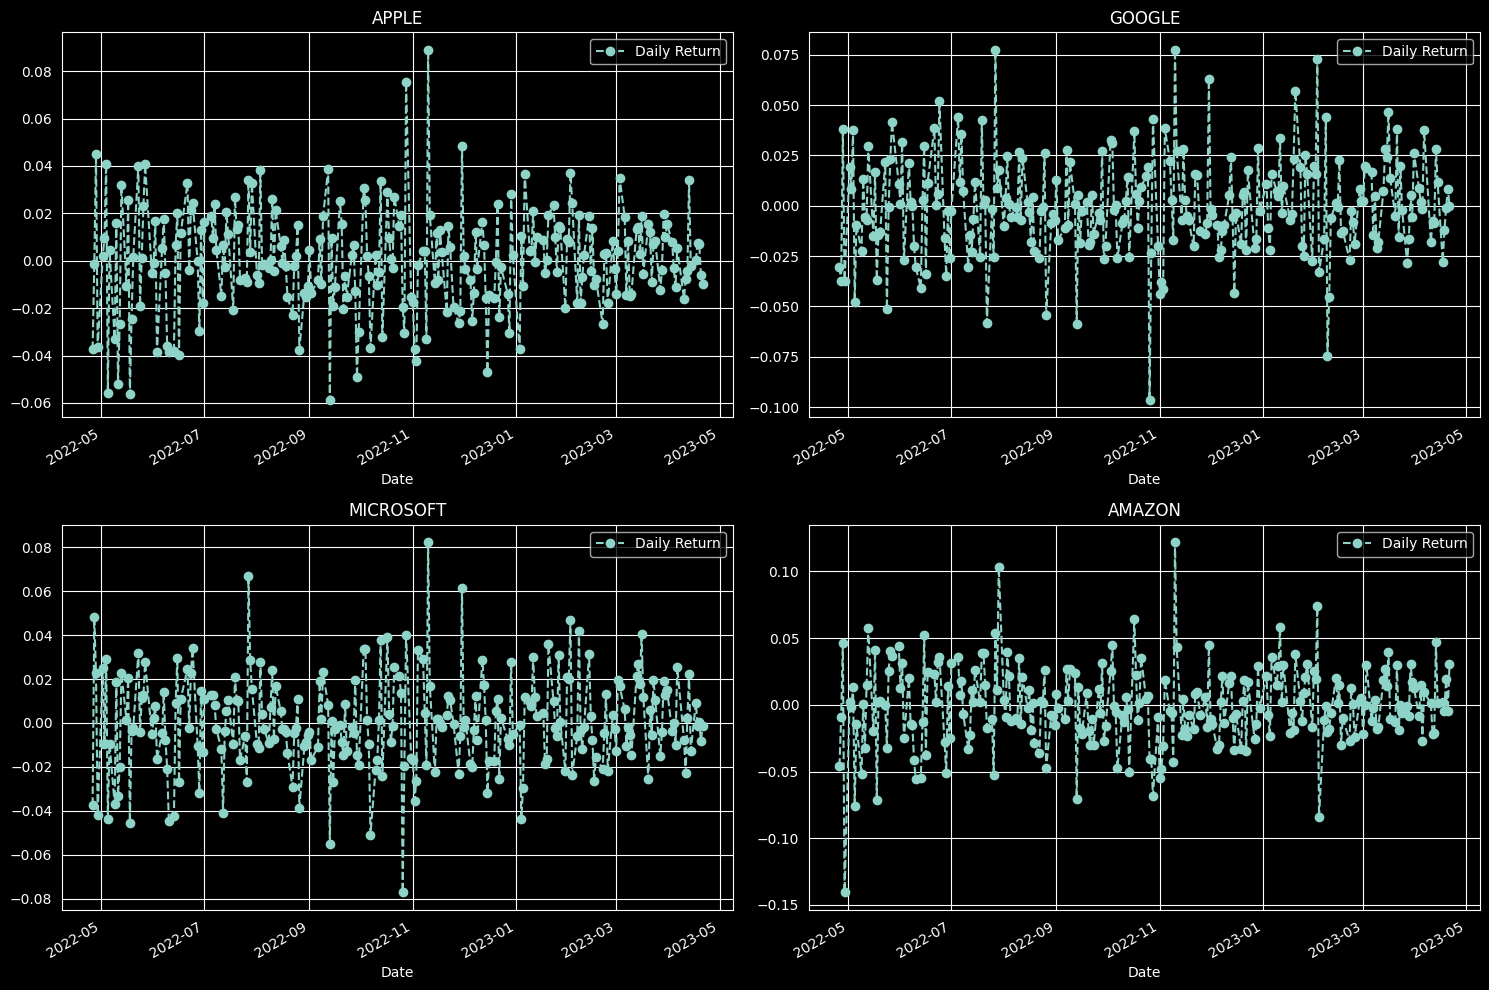

In [9]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    # Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

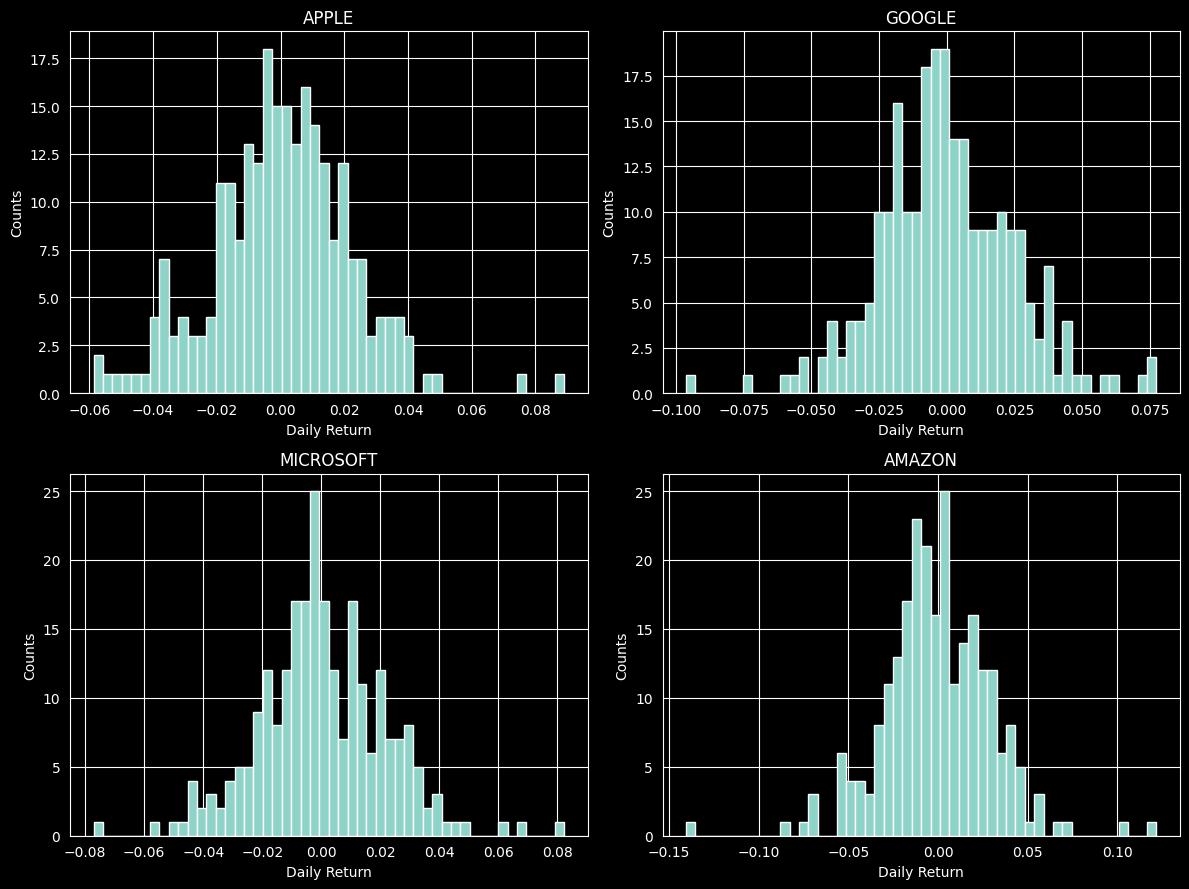

In [10]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

4.   The correlation between different stocks closing price ?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-25,NaN,NaN,NaN,NaN
2022-04-26,-0.037328,-0.045751,-0.030377,-0.037404
2022-04-27,-0.001467,-0.008781,-0.037534,0.048109
2022-04-28,0.045155,0.046534,0.038176,0.022633
2022-04-29,-0.036605,-0.140494,-0.037224,-0.041812


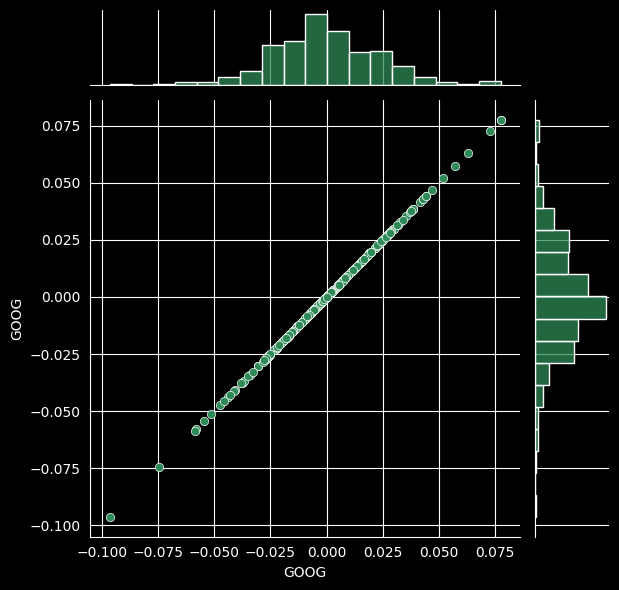

In [12]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

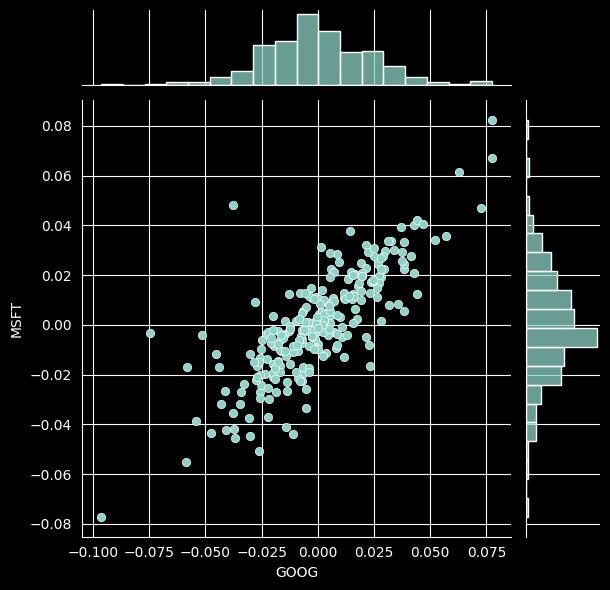

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

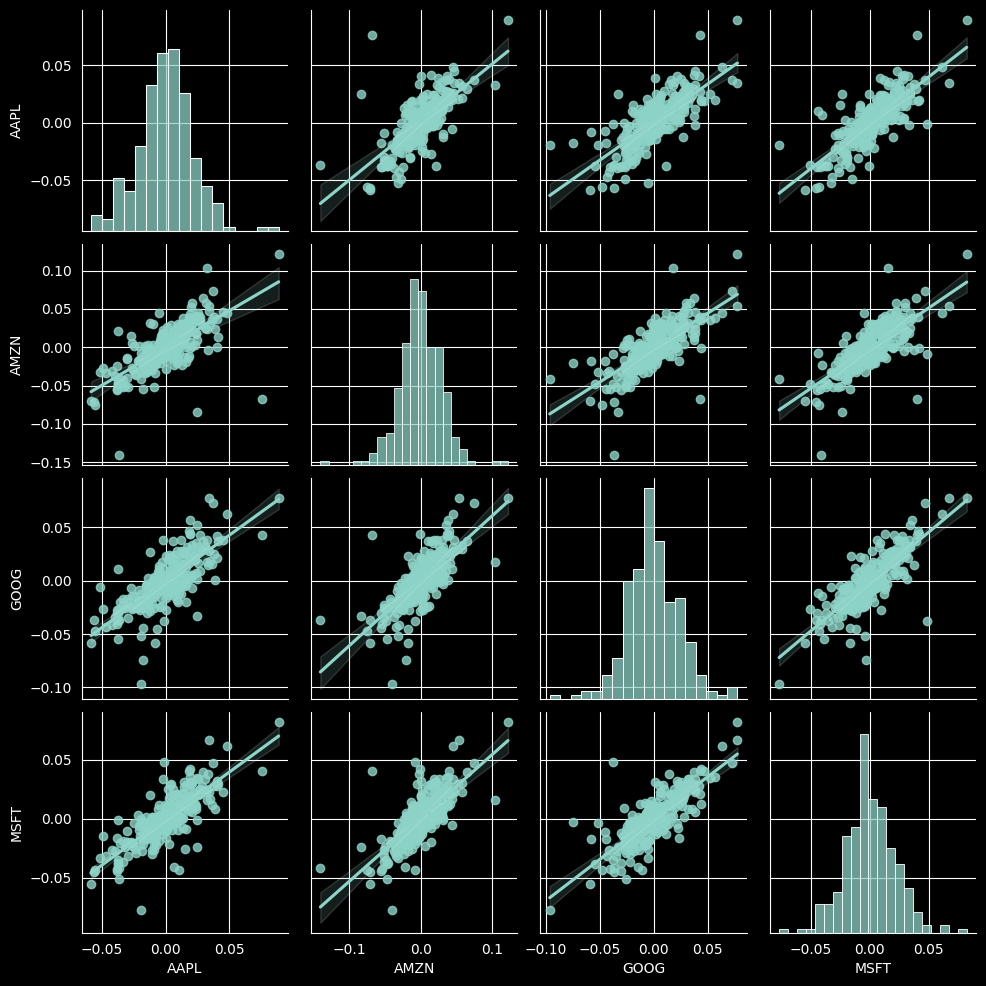

In [14]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

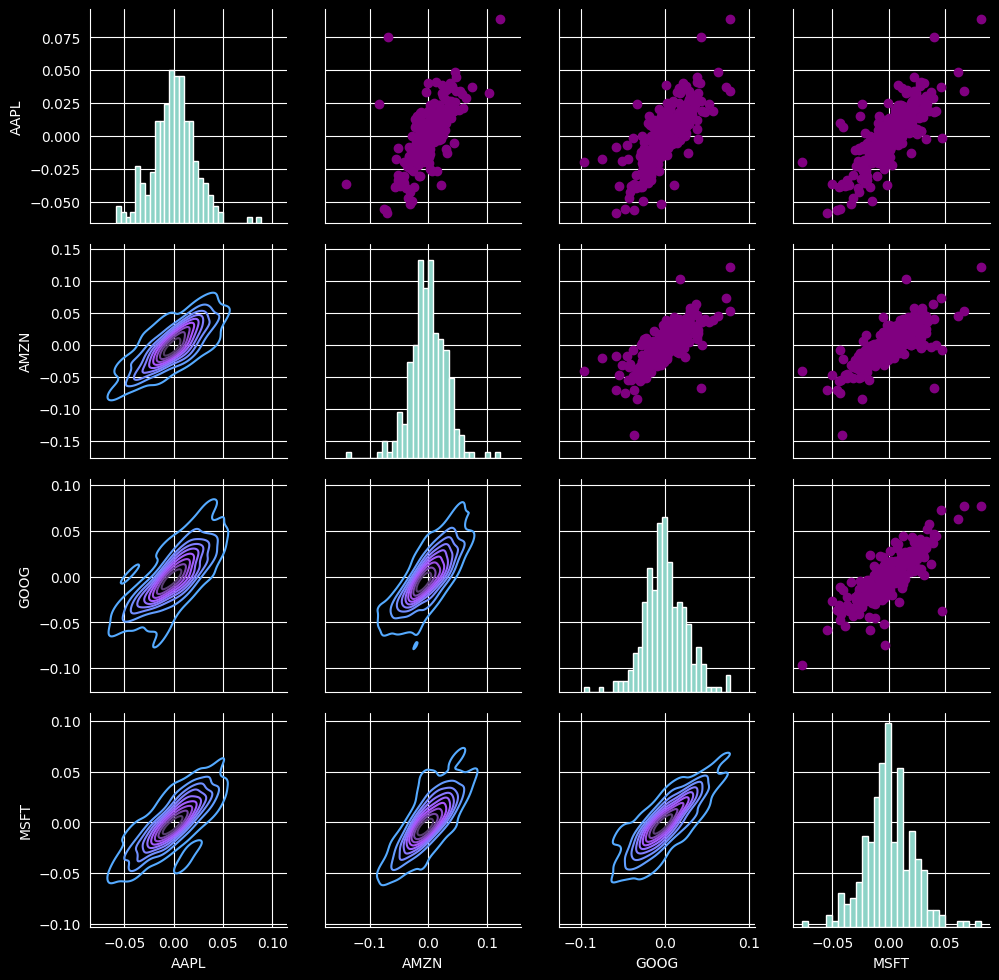

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

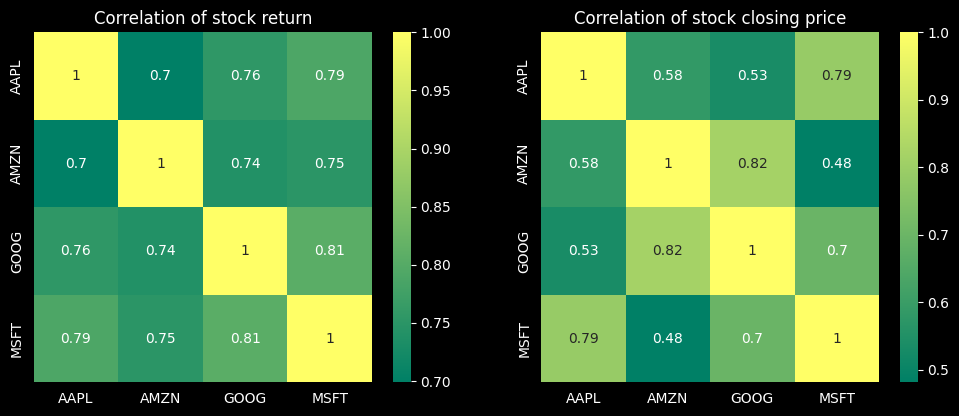

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

We see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

5.   How mush we risk if we invest in a particular stock ?

There are different ways to quantify the risk of investing in a particular stock, but here are some common methods:

* Volatility and Beta: Volatility is a measure of how
much a stock price varies over time. Beta is a measure of how much a stock price moves relative to the overall market. A stock with a high volatility and/or beta is generally considered to be riskier than a stock with low volatility and/or beta. You can calculate these measures using statistical tools and financial data, or you can find them on financial websites and trading platforms.

* Fundamental analysis: Fundamental analysis is a method of evaluating the intrinsic value of a stock by examining its financial and economic data, such as earnings, revenue, debt, growth potential, industry trends, and management quality. A stock with strong fundamentals is generally considered to be less risky than a stock with weak fundamentals.

* Technical analysis: Technical analysis is a method of evaluating a stock's price and volume trends using charts, indicators, and other technical tools. It focuses on identifying patterns, support and resistance levels, momentum, and other factors that can indicate future price movements. A stock with a positive technical outlook is generally considered to be less risky than a stock with a negative technical outlook.

* Diversification: Diversification is a method of reducing risk by investing in a variety of stocks, bonds, and other assets that are not highly correlated with each other. By spreading your investments across different sectors and asset classes, you can reduce the impact of a single stock's performance on your overall portfolio.

We will go with a basic way which is comparing the expected return with the standard deviation of the daily returns.

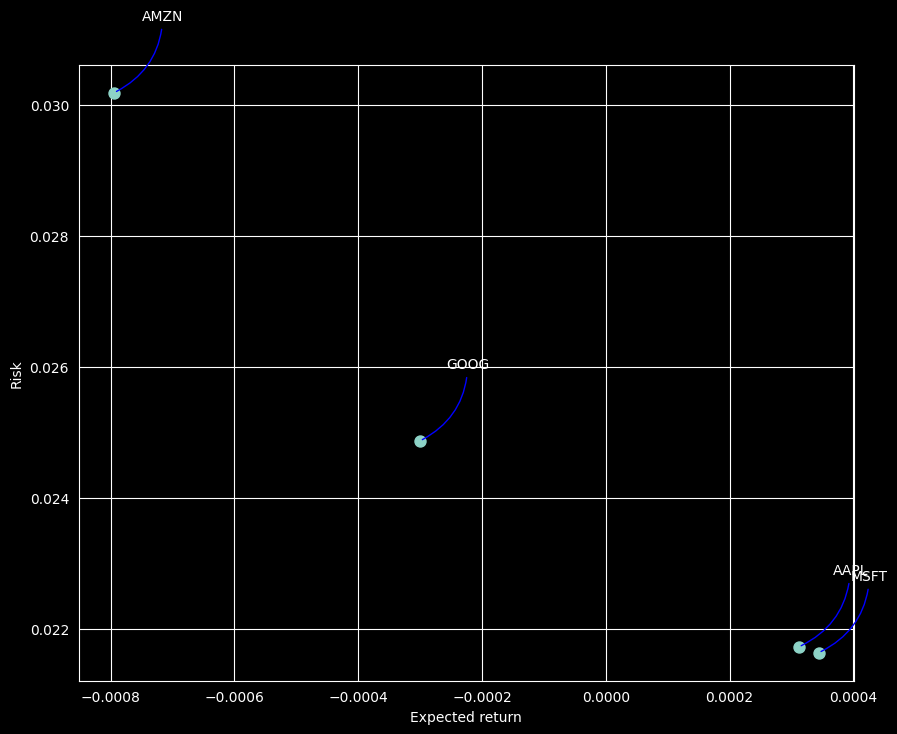

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


6. Predincting the closing price stock of Microsoft

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.413063,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.917002,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.140965,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.484915,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.188953,59706800
...,...,...,...,...,...,...
2023-04-17,289.929993,291.600006,286.160004,288.799988,288.799988,23836200
2023-04-18,291.570007,291.760010,287.010010,288.369995,288.369995,20161800
2023-04-19,285.989990,289.049988,284.540009,288.450012,288.450012,17150300


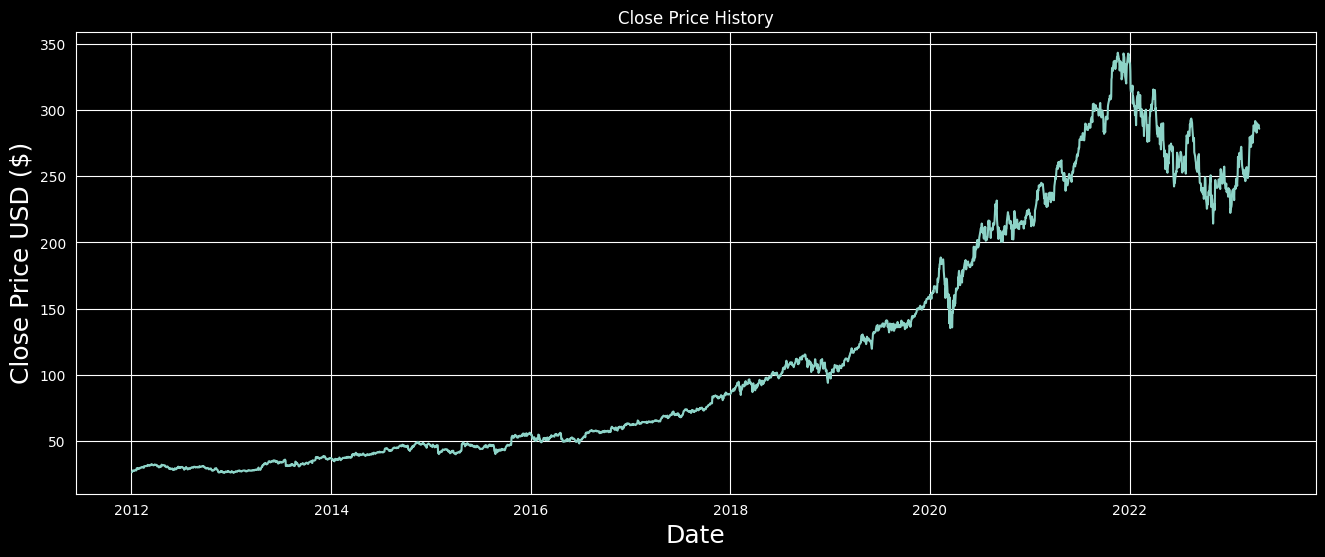

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2702

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.82742951],
       [0.82004167],
       [0.81893674]])

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902948, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638568, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989012, 0.02020585,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153685590104426]

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.0

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2642/2642 [==============================] - 121s 44ms/step - loss: 0.0012


In [24]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 3s 74ms/step


10.008620265847453

<ipython-input-25-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


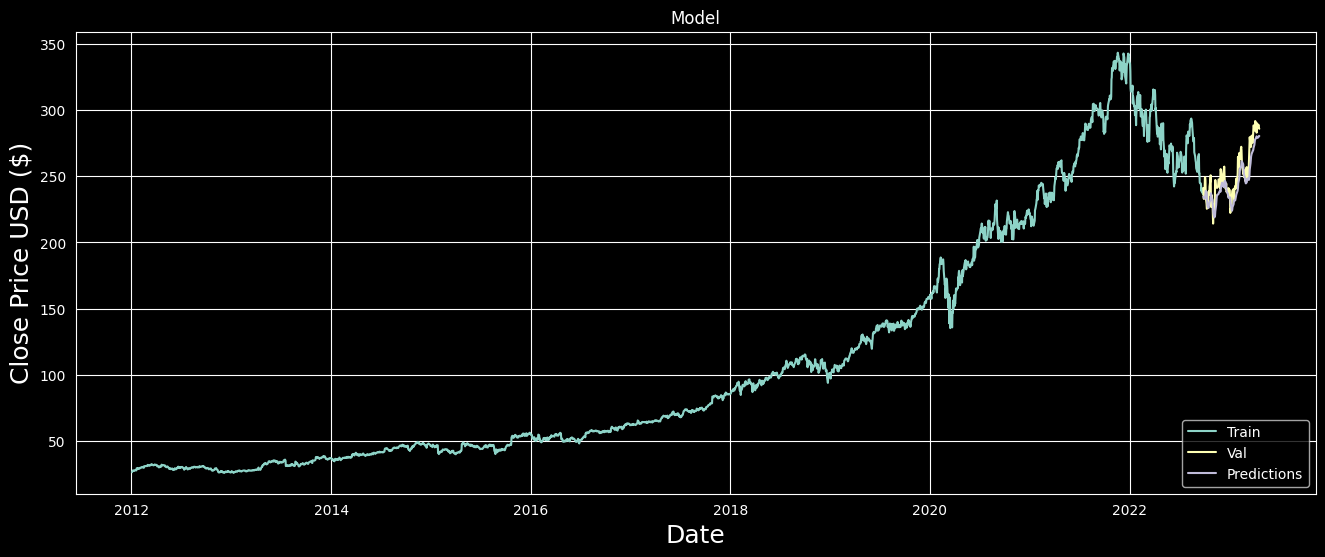

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-09-28,241.070007,234.492203
2022-09-29,237.500000,234.353821
2022-09-30,232.899994,234.077789
2022-10-03,240.740005,233.041824
2022-10-04,248.880005,233.110336
...,...,...
2023-04-17,288.799988,279.183563
2023-04-18,288.369995,279.585327
2023-04-19,288.450012,280.003235


## Summary
In this notebook,we discoverd and explored the stock data by using the YAHOO Finance Website with yfinance.